In [61]:
library(randomForest)
library(caret)
library(ggplot2)
library(Metrics)

In [62]:
df <- read.csv("../../../Cleaned Datasets R/emissions_cleaned.csv")

set.seed(42)

train_index <- createDataPartition(df$Comb.CO2, p = 0.7, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [63]:
set.seed(42)

num_predictors <- length(names(train_data)) - 1
mtry_sqrt <- floor(sqrt(num_predictors))

model <- randomForest(Comb.CO2 ~ ., data = train_data, ntree = 40, 
            mtry = mtry_sqrt, maxnodes=20, do.trace=TRUE)

print(model)
summary(model)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |     1253    28.00 |
   2 |     1187    26.51 |
   3 |     1076    24.03 |
   4 |    926.5    20.69 |
   5 |    808.2    18.05 |
   6 |    858.3    19.17 |
   7 |    824.7    18.42 |
   8 |    766.7    17.13 |
   9 |      718    16.04 |
  10 |    663.5    14.82 |
  11 |    653.9    14.61 |
  12 |    631.7    14.11 |
  13 |    609.7    13.62 |
  14 |    604.4    13.50 |
  15 |    600.4    13.41 |
  16 |    610.4    13.64 |
  17 |    581.4    12.99 |
  18 |    582.7    13.02 |
  19 |    598.3    13.36 |
  20 |    585.1    13.07 |
  21 |    585.3    13.07 |
  22 |    565.7    12.64 |
  23 |    565.5    12.63 |
  24 |    552.7    12.35 |
  25 |    551.7    12.32 |
  26 |    546.5    12.21 |
  27 |    568.6    12.70 |
  28 |    579.1    12.93 |
  29 |    577.6    12.90 |
  30 |    594.5    13.28 |
  31 |      586    13.09 |
  32 |    570.1    12.73 |
  33 |    560.7    12.52 |
  34 |    555.6    12.41 |
  35 |    555.7    12.41 |
 

                Length Class  Mode     
call               7   -none- call     
type               1   -none- character
predicted       4433   -none- numeric  
mse               40   -none- numeric  
rsq               40   -none- numeric  
oob.times       4433   -none- numeric  
importance         8   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               4433   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [64]:
predictions <- predict(model, test_data)
actual <- test_data$Comb.CO2

In [65]:
mae_value <- mae(actual, predictions)
print(paste("Mean Absolute Error:", mae_value))

mse_value <- mse(actual, predictions)
print(paste("Mean Squared Error:", mse_value))

rmse_value <- rmse(actual, predictions)
print(paste("Root Mean Squared Error:", rmse_value))

r_squared_value <- summary(lm(predictions ~ actual))$r.squared
print(paste("R-squared score:", r_squared_value))

[1] "Mean Absolute Error: 16.9839974569643"
[1] "Mean Squared Error: 541.143035089305"
[1] "Root Mean Squared Error: 23.2624812754208"
[1] "R-squared score: 0.90217039305382"


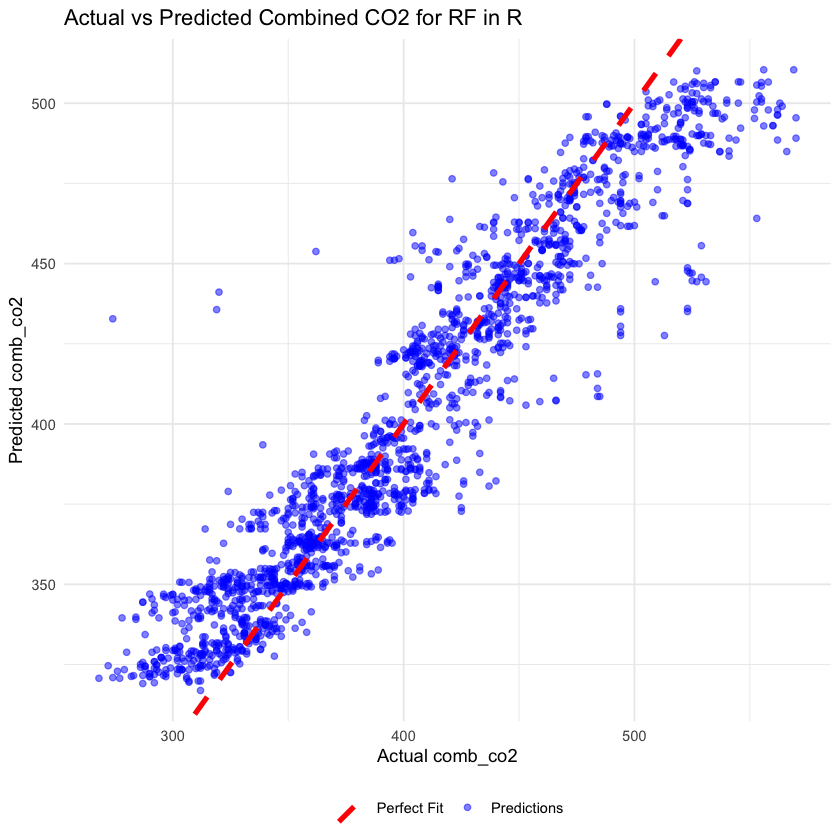

In [66]:
data_plot <- data.frame(
  Actual = actual,
  Predicted = predictions
)

p <- ggplot(data_plot, aes(x = Actual, y = Predicted)) +
  geom_point(aes(color = "Predictions"), alpha = 0.5) + 
  geom_abline(aes(color = "Perfect Fit", intercept = 0, slope = 1), linetype = "dashed", linewidth = 1.5) +
  scale_color_manual(values = c("Predictions" = "blue", "Perfect Fit" = "red"), name = "", labels = c("Perfect Fit", "Predictions")) +
  labs(title = "Actual vs Predicted Combined CO2 for RF in R", 
       x = "Actual comb_co2", 
       y = "Predicted comb_co2") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(p)